# dftrotationproperty - illustrates the rotation property of the Discrete Fourier Transform

The rotation property of the DFT is not exact as in the continuous Fourier Transform, but if the image has an object surrounded by a larger area with zeros around it, the property works visually.

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys,os
path = os.path.abspath('/etc/jupyterhub/ia898_1s2017/d191122/Aula_6/')
if path not in sys.path:
    sys.path.append(path)
import ptrans as ptr
import affine2 as aff2

In [1]:
def dftrotationproperty(f,scale, angle):
    '''
    Inputs:
    f - image
    scale - image scale. It should be less than 1.
    angle - angle in rads.
    '''
    r,c = f.shape
    T = np.eye(3)
    T = T*0.5
    T[0,2]= r//8
    T[1,2]= c//8

    T1 = np.array([ [1, 0, r//2],
                    [0, 1, c//2],
                    [0, 0, 1   ] ])

    T2 = np.array([[np.cos(angle), -np.sin(angle), 0],
                   [np.sin(angle), np.cos(angle) , 0],
                   [0            , 0             , 1]])

    T3 = np.array([ [1, 0, -r//2],
                    [0, 1, -c//2],
                    [0, 0, 1   ] ])

    Tr = T1.dot(T2.dot(T3))

    g =  aff2.affine2(f,T)
    gr = aff2.affine2(g,Tr)

    F = np.fft.fft2(f)
    G = np.fft.fft2(g)
    GR = np.fft.fft2(gr)

    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 5))
    im = axes[0,0].imshow(f, cmap="gray")
    im = axes[0,1].imshow(g, cmap="gray")
    im = axes[0,2].imshow(gr, cmap="gray")
    im = axes[1,0].imshow(np.log(np.abs(ptr.ptransfat(F,(r//2,c//2)))+1),cmap='gray')
    im = axes[1,1].imshow(np.log(np.abs(ptr.ptransfat(G,(r//2,c//2)))+1),cmap='gray')
    im = axes[1,2].imshow(np.log(np.abs(ptr.ptransfat(GR,(r//2,c//2)))+1),cmap='gray')
    fig.colorbar(im, ax=axes.ravel().tolist())

In [4]:
testing = (__name__ == '__main__')

if testing:
    ! jupyter nbconvert --to 'python' dftrotationproperty

    path = os.path.abspath('/etc/jupyterhub/ia898_1s2017/d191122/Aula_7/')
    if path not in sys.path:
        sys.path.append(path)
    import dftrotationproperty as dftrp

[NbConvertApp] Converting notebook dftrotationproperty.ipynb to python
[NbConvertApp] Writing 3823 bytes to dftrotationproperty.py


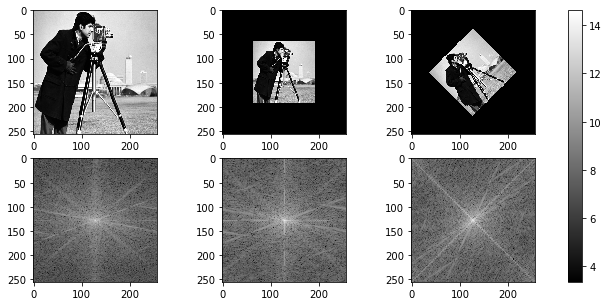

In [5]:
if testing:    
    import numpy as np
    f = mpimg.imread('/home/lotufo/ia898/data/cameraman.tif')
    dftrp.dftrotationproperty(f,0.5, np.pi/4)

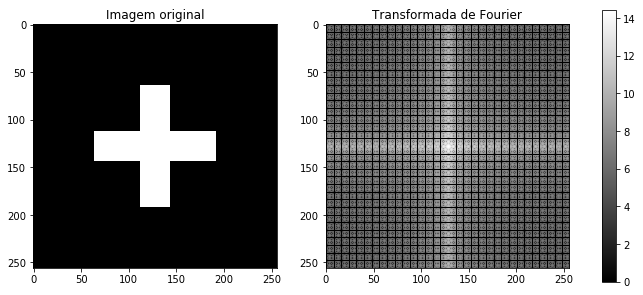

In [6]:
if testing:
    #Create image

    f = np.zeros((256,256));
    H,W = f.shape
    a,b = (64,16)
    f[H//2-a:H//2+a,W//2-b:W//2+b]=255
    f[H//2-b:H//2+b,W//2-a:W//2+a]=255

    F = np.fft.fft2(f)
   
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    axes[0].set_title('Imagem original')
    im = axes[0].imshow(f, cmap="gray")
    axes[1].set_title('Transformada de Fourier')
    im = axes[1].imshow(np.log(np.abs(ptr.ptransfat(F,(H//2,W//2)))+1),cmap='gray')    
    fig.colorbar(im, ax=axes.ravel().tolist())

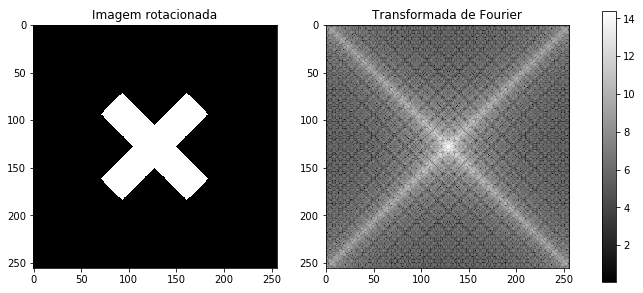

In [7]:
if testing:
    #rotate image
    H,W = f.shape
    angle = np.pi/4
    T1 = np.array([ [1, 0, H//2],
                    [0, 1, W//2],
                    [0, 0, 1   ] ])

    T2 = np.array([[np.cos(angle), -np.sin(angle), 0],
                   [np.sin(angle), np.cos(angle) , 0],
                   [0            , 0             , 1]])

    T3 = np.array([ [1, 0, -H//2],
                    [0, 1, -W//2],
                    [0, 0, 1   ] ])

    T = T1.dot(T2.dot(T3))
    
    g =  aff2.affine2(f,T)
    G = np.fft.fft2(g)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    axes[0].set_title('Imagem rotacionada')
    im = axes[0].imshow(g, cmap="gray")
    axes[1].set_title('Transformada de Fourier')
    im = axes[1].imshow(np.log(np.abs(ptr.ptransfat(G,(H//2,W//2)))+1),cmap='gray')    
    fig.colorbar(im, ax=axes.ravel().tolist())
    
    